# Regression 

In [268]:
# To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

### 1. Understand the Problem Statement.

    Goal: Predict car prices in the US market based on different factors.
    Objective: Identify significant variables influencing car prices and how well they describe the price.

### 2. Import Necessary Libraries and Data.

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset:
        

In [270]:
data=pd.read_csv('CarPrice_Assignment.csv')

### 3. Exploratory Data Analysis

In [271]:
# To Check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [272]:
# To See data description
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [273]:
data.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [274]:
# to check the missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [275]:
# To Check for duplicates
data.duplicated().sum()

0

In [276]:
# To Check column of dataset
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [277]:
# To check unique values of dataset
data.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [278]:
# Length of unique values in each column
len(data.nunique())

26

In [279]:
# To check the shape of dataset (number of rows and columns)
data.shape

(205, 26)

In [280]:
print('Number of rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of rows:  205
Number of columns:  26


## 4. Data Preprocessing

In [281]:
# Drop Car_ID
data=data.drop(['car_ID'], axis=1)

In [282]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [283]:
data['CarName'].head(25)

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
20         chevrolet vega 2300
21               dodge rampage
22         dodge challenger se
23                  dodge d200
24           dodge monaco (sw)
Name: CarName, dtype: object

In [284]:
# Extract Company Name from Car Name
data['company']=data['CarName'].apply(lambda x:x.split(' ')[0])
data.head(25)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


In [285]:
data['company']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: company, Length: 205, dtype: object

In [286]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [287]:
#data_without_car_id=data.drop(['car_ID'], axis=1)
data=data.drop(['CarName'], axis=1)

In [288]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [289]:
# Correct the spelling mistakes in company names
data_without_car_id['company'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                                        'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, inplace=True)

#df['CompanyName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 
 #                          'porcshce': 'porsche', 'toyouta': 'toyota', 
  #                         'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, 
   #                       inplace=True)


In [290]:
data['company'].values

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick',
       'buick', 'buick', 'buick', 'buick', 'buick', 'mercury',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'Nissan', 'nissan

In [291]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [292]:
data.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,2,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,1,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,1,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,1,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [293]:
#Label Encoding for Categorical Variables:
label_encoder=LabelEncoder()
data['fueltype']=label_encoder.fit_transform(data['fueltype'])
data['aspiration']=label_encoder.fit_transform(data['aspiration'])
data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [294]:
# Remaining categorical column transform to nuemerical by using for loop
cat_col=data.select_dtypes(include=['object']).columns
cat_col
for col in cat_col:
    data[col]=label_encoder.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int32  
 13  cylindernumber    205 non-null    int32  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int32  
 16  boreratio         205 non-null    float64
 1

In [295]:
data.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.000,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.000,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.000,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.000,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.000,2
5,2,1,0,1,3,1,0,99.8,177.3,66.3,...,5,3.19,3.40,8.5,110,5500,19,25,15250.000,2
6,1,1,0,0,3,1,0,105.8,192.7,71.4,...,5,3.19,3.40,8.5,110,5500,19,25,17710.000,2
7,1,1,0,0,4,1,0,105.8,192.7,71.4,...,5,3.19,3.40,8.5,110,5500,19,25,18920.000,2
8,1,1,1,0,3,1,0,105.8,192.7,71.4,...,5,3.13,3.40,8.3,140,5500,17,20,23875.000,2
9,0,1,1,1,2,0,0,99.5,178.2,67.9,...,5,3.13,3.40,7.0,160,5500,16,22,17859.167,2


<Axes: xlabel='price'>

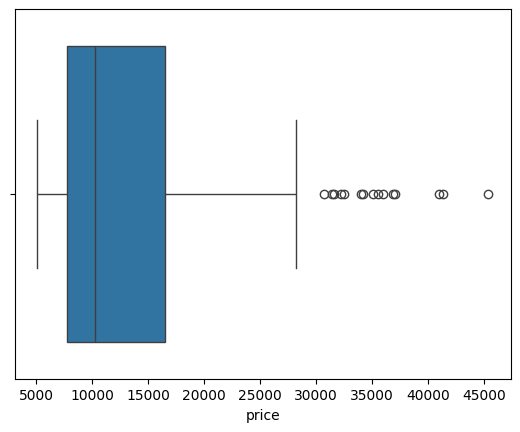

In [296]:
# Outlier Detection and Removal by using boxplot:
         
sns.boxplot(data['price'], orient='h')

In [ ]:
# Outlier detection and removal using IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower= Q1-1.5*IQR
higher=Q3+1.5*IQR

data1=data[(data>lower) & (data<higher)]

In [313]:
data1.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.000,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.000,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.000,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.000,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.000,2
5,2,1,0,1,3,1,0,99.8,177.3,66.3,...,5,3.19,3.40,8.5,110,5500,19,25,15250.000,2
6,1,1,0,0,3,1,0,105.8,192.7,71.4,...,5,3.19,3.40,8.5,110,5500,19,25,17710.000,2
7,1,1,0,0,4,1,0,105.8,192.7,71.4,...,5,3.19,3.40,8.5,110,5500,19,25,18920.000,2
8,1,1,1,0,3,1,0,105.8,192.7,71.4,...,5,3.13,3.40,8.3,140,5500,17,20,23875.000,2
9,0,1,1,1,2,0,0,99.5,178.2,67.9,...,5,3.13,3.40,7.0,160,5500,16,22,17859.167,2


In [312]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data2 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data2.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.00,102,5500,24,30,13950.0,2
10,2,1,0,1,3,2,0,101.2,176.8,64.8,...,5,3.50,2.80,8.80,101,5800,23,29,16430.0,3
11,0,1,0,0,3,2,0,101.2,176.8,64.8,...,5,3.50,2.80,8.80,101,5800,23,29,16925.0,3
19,1,1,0,1,2,1,0,94.5,155.9,63.6,...,1,3.03,3.11,9.60,70,5400,38,43,6295.0,5
20,0,1,0,0,3,1,0,94.5,158.8,63.6,...,1,3.03,3.11,9.60,70,5400,38,43,6575.0,5
21,1,1,0,1,2,1,0,93.7,157.3,63.8,...,1,2.97,3.23,9.41,68,5500,37,41,5572.0,6
22,1,1,0,1,2,1,0,93.7,157.3,63.8,...,1,2.97,3.23,9.40,68,5500,31,38,6377.0,6
24,1,1,0,0,2,1,0,93.7,157.3,63.8,...,1,2.97,3.23,9.40,68,5500,31,38,6229.0,6
25,1,1,0,0,3,1,0,93.7,157.3,63.8,...,1,2.97,3.23,9.40,68,5500,31,38,6692.0,6
26,1,1,0,0,3,1,0,93.7,157.3,63.8,...,1,2.97,3.23,9.40,68,5500,31,38,7609.0,6


## 5. Feature Selection

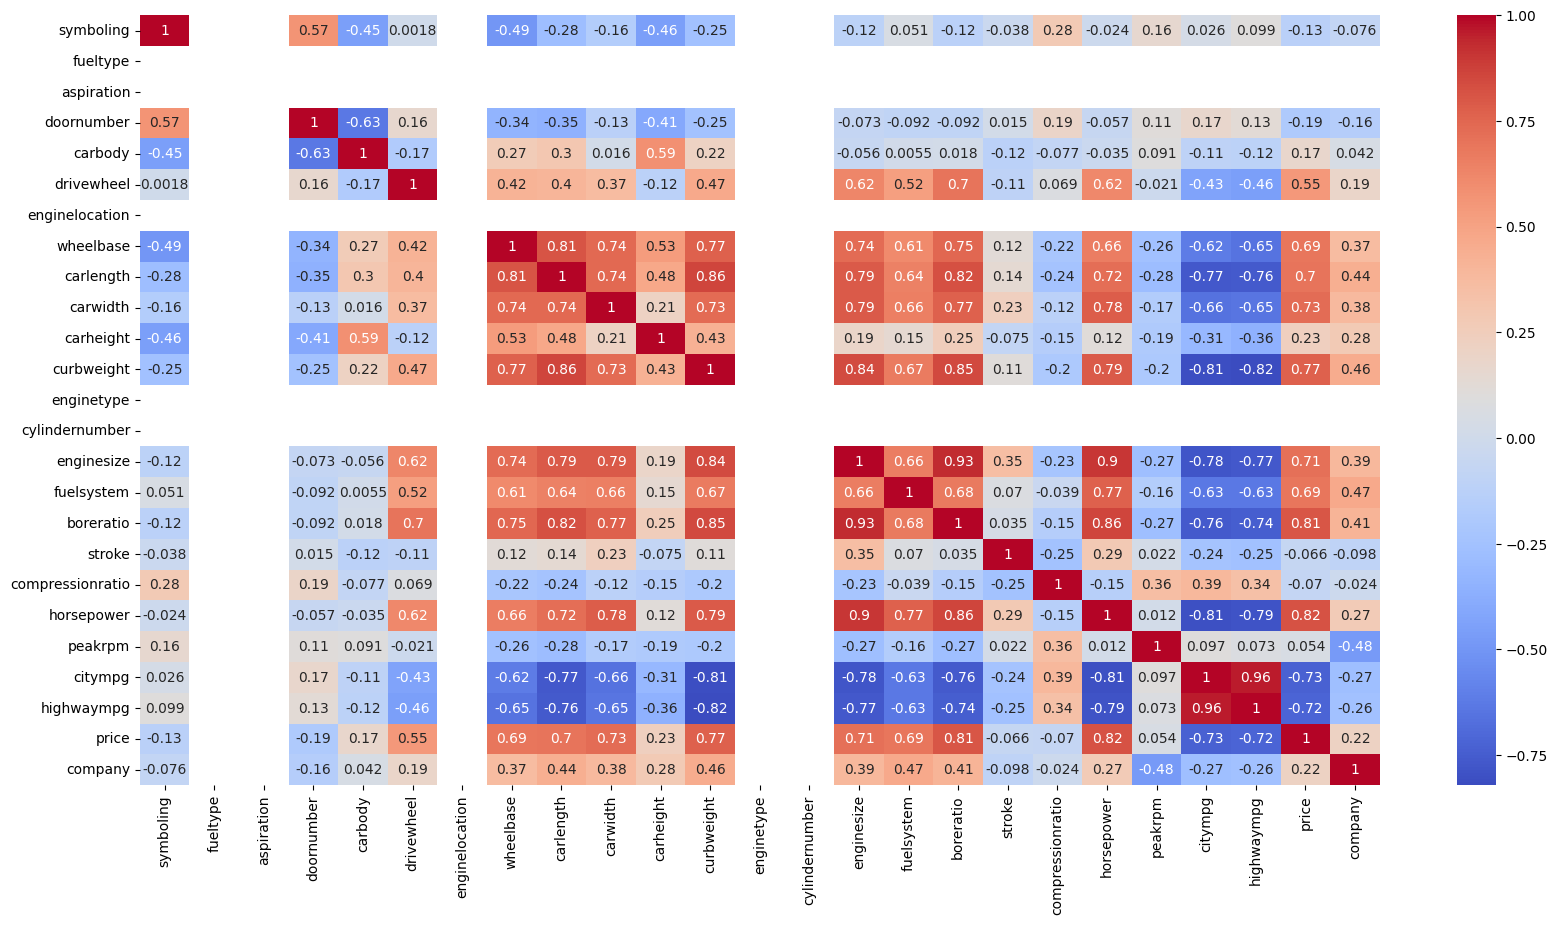

In [314]:
#Correlation Matrix:
plt.figure(figsize=(20,10))
corr_matric = data2.corr()
sns.heatmap(corr_matric, annot=True, cmap='coolwarm')
plt.show()

## 6. Remove multicollinearity by dropping features with high correlation (> 0.85)

In [266]:
threshold = 0.85
high_corr_features = [col for col in corr_matrix.columns if any(corr_matrix[col] > threshold) and col != 'price']
data1.drop(columns=high_corr_features, inplace=True)


 ## 7. Data Splitting

In [315]:
data1.head(20)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,13495.000,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21,27,16500.000,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19,26,16500.000,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24,30,13950.000,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18,22,17450.000,2
5,2,1,0,1,3,1,0,99.8,177.3,66.3,...,5,3.19,3.40,8.5,110,5500,19,25,15250.000,2
6,1,1,0,0,3,1,0,105.8,192.7,71.4,...,5,3.19,3.40,8.5,110,5500,19,25,17710.000,2
7,1,1,0,0,4,1,0,105.8,192.7,71.4,...,5,3.19,3.40,8.5,110,5500,19,25,18920.000,2
8,1,1,1,0,3,1,0,105.8,192.7,71.4,...,5,3.13,3.40,8.3,140,5500,17,20,23875.000,2
9,0,1,1,1,2,0,0,99.5,178.2,67.9,...,5,3.13,3.40,7.0,160,5500,16,22,17859.167,2


In [317]:
#Train-Test Split:
X = data2.drop(['price'], axis=1)
y = data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [304]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## 7. Model Selection and Implementation

In [318]:
# Linear Regression:
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr=lr.predict(X_test)


In [319]:
# Decision Tree Regressor:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [320]:
#Random Forest Regressor:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [332]:
#Gradient Boosting Regressor:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [321]:
#Support Vector Regressor:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

## 8. Model Evaluation

In [344]:
# Evaluate Performance:

# Use metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score:

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_gb, rmse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)
mse_svr, rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

print("\nLinear Regression: MSE =", mse_lr, "; RMSE =", rmse_lr, "; R² =", r2_lr)
print("\nDecision Tree: MSE =", mse_dt, "; RMSE =", rmse_dt, "; R² =", r2_dt)
print("\nRandom Forest: MSE =", mse_rf, "; RMSE =", rmse_rf, "; R² =", r2_rf)
print("\nGradient Boosting: MSE =", mse_gb, "; RMSE =", rmse_gb, "; R² =", r2_gb)
print("\nSupport Vector Regressor: MSE =", mse_svr, "; RMSE =", rmse_svr, "; R² =", r2_svr)


Linear Regression: MSE = 4284529.682384833 ; RMSE = 2069.9105493679754 ; R² = 0.3798334457479893

Decision Tree: MSE = 2715584.2 ; RMSE = 1647.9029704445588 ; R² = 0.6069313037976668

Random Forest: MSE = 1819212.407751533 ; RMSE = 1348.7818236288376 ; R² = 0.7366771211770924

Gradient Boosting: MSE = 2161484.471636689 ; RMSE = 1470.1987864355924 ; R² = 0.6871347671238395

Support Vector Regressor: MSE = 8861393.494766526 ; RMSE = 2976.8092808855804 ; R² = -0.28264716944652846
